<a href="https://colab.research.google.com/github/SYongho/Estimated-LH-PG-in-horizontal-pipe/blob/main/LH_PG_feature_select.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel, RFE
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.linear_model import LogisticRegression

# Data split

### 10 inputs

In [ ]:
prepared_data = pd.read_csv('prepared_data.csv')

csv_inp = prepared_data.iloc[:, :10]
csv_out_LH = prepared_data.iloc[:, [10]]
csv_out_PG = prepared_data.iloc[:, [11]]

train_inp, test_inp, train_out_LH, test_out_LH = train_test_split(csv_inp, csv_out_LH, test_size=0.2, random_state=38)
train_inp, val_inp, train_out_LH, val_out_LH = train_test_split(train_inp, train_out_LH, test_size=0.11, random_state=38)
train_inp, test_inp, train_out_PG, test_out_PG = train_test_split(csv_inp, csv_out_PG, test_size=0.2, random_state=38)
train_inp, val_inp, train_out_PG, val_out_PG = train_test_split(train_inp, train_out_PG, test_size=0.11, random_state=38)

### 5 inputs

In [3]:
csv_inp = pd.read_csv('ins.csv')
csv_out = pd.read_csv('outs.csv')
csv_out_LH = csv_out.iloc[:, 0]
csv_out_PG = csv_out.iloc[:, 1]

train_inp, test_inp, train_out_LH, test_out_LH = train_test_split(csv_inp, csv_out_LH, test_size=0.2, random_state=38)
train_inp, val_inp, train_out_LH, val_out_LH = train_test_split(train_inp, train_out_LH, test_size=0.11, random_state=38)
train_inp, test_inp, train_out_PG, test_out_PG = train_test_split(csv_inp, csv_out_PG, test_size=0.2, random_state=38)
train_inp, val_inp, train_out_PG, val_out_PG = train_test_split(train_inp, train_out_PG, test_size=0.11, random_state=38)

# Feature select

In [4]:
select_ETR = RFE(ExtraTreesRegressor(random_state=38), n_features_to_select=10)
fit = select_ETR.fit(train_inp, train_out_LH)
train_inp_rfe = select_ETR.fit_transform(train_inp, train_out_LH)
test_inp_rfe = select_ETR.transform(test_inp)
print('Num Features_LH: {}'.format(fit.n_features_))
print('Selected Features_LH: {}'.format(fit.support_))
print('Feature Ranking_LH: {}'.format(fit.ranking_))

select_ETR = RFE(ExtraTreesRegressor(random_state=38), n_features_to_select=10)
fit = select_ETR.fit(train_inp, train_out_PG)
train_inp_rfe = select_ETR.fit_transform(train_inp, train_out_PG)
test_inp_rfe = select_ETR.transform(test_inp)
print('Num Features_PG: {}'.format(fit.n_features_))
print('Selected Features_PG: {}'.format(fit.support_))
print('Feature Ranking_PG: {}'.format(fit.ranking_))

Num Features_LH: 5
Selected Features_LH: [ True  True  True  True  True]
Feature Ranking_LH: [1 1 1 1 1]
Num Features_PG: 5
Selected Features_PG: [ True  True  True  True  True]
Feature Ranking_PG: [1 1 1 1 1]


In [5]:
select_RFR = RFE(RandomForestRegressor(n_estimators=100, random_state=38), n_features_to_select=10)
fit = select_RFR.fit(train_inp, train_out_LH)
train_inp_rfe = select_RFR.fit_transform(train_inp, train_out_LH)
test_inp_rfe = select_RFR.transform(test_inp)
print('Num Features_LH: {}'.format(fit.n_features_))
print('Selected Features_LH: {}'.format(fit.support_))
print('Feature Ranking_LH: {}'.format(fit.ranking_))

select_RFR = RFE(RandomForestRegressor(n_estimators=100, random_state=38), n_features_to_select=10)
fit = select_RFR.fit(train_inp, train_out_PG)
train_inp_rfe = select_RFR.fit_transform(train_inp, train_out_PG)
test_inp_rfe = select_RFR.transform(test_inp)
print('Num Features_PG: {}'.format(fit.n_features_))
print('Selected Features_PG: {}'.format(fit.support_))
print('Feature Ranking_PG: {}'.format(fit.ranking_))

Num Features_LH: 5
Selected Features_LH: [ True  True  True  True  True]
Feature Ranking_LH: [1 1 1 1 1]
Num Features_PG: 5
Selected Features_PG: [ True  True  True  True  True]
Feature Ranking_PG: [1 1 1 1 1]


Text(0.5, 0, 'feature number_PG')

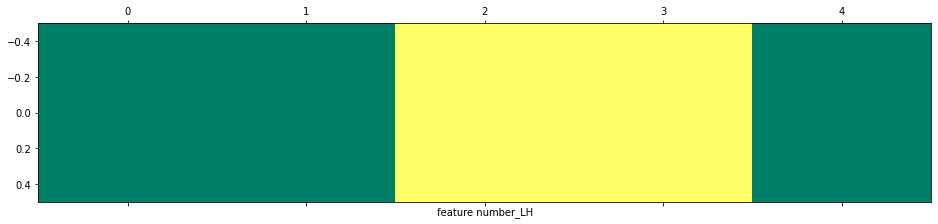

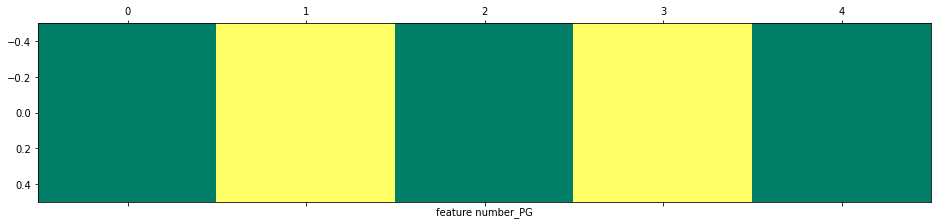

In [6]:
select = SelectFromModel(RandomForestRegressor(n_estimators=80, random_state=38), threshold='median')
select.fit(train_inp, train_out_LH)
train_inp_sl = select.transform(train_inp)
look = select.get_support()
plt.matshow(look.reshape(1, -1), cmap='summer_r')
plt.xlabel('feature number_LH')

select = SelectFromModel(RandomForestRegressor(n_estimators=80, random_state=38), threshold='median')
select.fit(train_inp, train_out_PG)
train_inp_sl = select.transform(train_inp)
look = select.get_support()
plt.matshow(look.reshape(1, -1), cmap='summer_r')
plt.xlabel('feature number_PG')

In [7]:
train_inp

,Liquid superficial velocity,Gas superficial velocity,Temperature,Liquid Density,Gas Density
266,1.73,1.51,37.9,870.4,2.16
57,0.50,5.00,21.2,880.0,2.20
25,0.05,0.68,21.0,884.2,1.30
279,0.21,1.54,26.9,880.2,1.33
13,0.50,19.80,26.8,880.0,2.90
...,...,...,...,...,...
28,1.34,10.40,21.1,874.0,4.50
304,0.10,1.06,32.0,877.0,1.40
0,0.10,0.52,32.3,877.1,1.22
307,0.10,0.71,26.8,880.1,1.28
